In [90]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
words=open('names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [92]:
len(words)

32033

In [93]:
chars=sorted(list(set("".join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}

In [94]:
#Build the dataser
block_size=3
X,Y=[],[]
for w in words:
    context=[0]*block_size
    for ch in w +'.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        context=context[1:]+[ix]
X=torch.tensor(X)
Y=torch.tensor(Y)

In [95]:
X.shape,X.dtype,Y.shape,Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [96]:
g=torch.Generator().manual_seed(2147483647)
C=torch.randn((27,2),generator=g)
W1=torch.randn((6,100),generator=g)
b1=torch.randn(100,generator=g)
W2=torch.randn((100,27),generator=g)
b2=torch.randn(27,generator=g)
parameters=[C,W1,b1,W2,b2]


In [97]:
sum(p.nelement() for p in parameters)

3481

In [98]:
for p in parameters:
    p.requires_grad=True

In [99]:
lre=torch.linspace(-3,0,1000)
lrs=10**lre

In [ ]:
lri=[]
lossi=[]

for i in range(1000):
    #miniset
    ix=torch.randint(0,X.shape[0],(32,))
    #forward pass
    emb=C[X[ix]]
    h=torch.tanh((emb.view(-1,6) @ W1) + b1)
    logits=h @ W2 + b2
    loss=F.cross_entropy(logits,Y[ix])
    #backward pass
    for p in parameters:
        p.grad=None
    loss.backward()
    #update
    lr=lrs[i]
    for p in parameters:
        p.data+=-lr*p.grad
    #track stats
    lri.append(lr)
    lossi.append(loss.item())


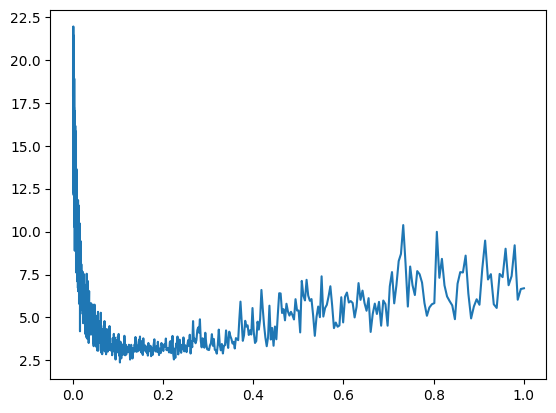

In [104]:
plt.plot(lrs,lossi)

In [102]:
emb=C[X]
h=torch.tanh((emb.view(-1,6) @ W1) + b1)
logits=h @ W2 + b2
loss=F.cross_entropy(logits,Y)
loss.item()

6.382654666900635